In [1]:
import requests
import numpy as np
import pandas as pd
import requests
import json
import time
from datetime import datetime
from datetime import timedelta
from collections import Counter

  #https://docs.reservoir.tools/reference/geteventsasksv3
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:
bayc_event.columns

Index(['orderSide', 'orderSource', 'orderKind', 'from', 'to', 'block',
       'txHash', 'timestamp', 'washTradingScore', 'token.contract',
       'token.tokenId', 'price.currency.symbol', 'price.amount.decimal',
       'price.amount.usd'],
      dtype='object')

###BAYC traits

In [3]:
#The first script
url = "https://api.opensea.io/api/v2/chain/ethereum/contract/0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d/nfts/9999"
headers = {
    "accept": "application/json",
    "x-api-key": api
}
r = requests.get(url, headers=headers)
json_data = json.loads(r.text)
df = pd.json_normalize(json_data, record_path=['nft', 'traits'], meta= [['nft','identifier']]) # this parameter adjust to new queries


In [4]:
df

,trait_type,display_type,max_value,trait_count,order,value,nft.identifier
0,Fur,None,None,496,None,Gray,9999
1,Background,None,None,1291,None,Purple,9999
2,Eyes,None,None,233,None,Scumbag,9999
3,Mouth,None,None,1551,None,Bored Unshaven,9999
4,Earring,None,None,462,None,Gold Hoop,9999
5,Hat,None,None,294,None,Army Hat,9999


In [ ]:
#Original function, to make 
#df_all= pd.Series([])
for i in range(9000,10000):
    print(i)
    url = 'https://api.opensea.io/api/v2/chain/ethereum/contract/0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d/nfts/'+f'{i}'
    headers = {
    "accept": "application/json",
    "x-api-key": api
    }
    r = requests.get(url, headers=headers)
    json_data = json.loads(r.text)
    time.sleep(0.5)
    df = pd.json_normalize(json_data, record_path=['nft', 'traits'], meta= [['nft','identifier']]) # this parameter adjust to new queries
    df_all = pd.concat([df_all, df])

In [27]:
df_all

,0,trait_type,display_type,max_value,trait_count,order,value,nft.identifier
0,NaN,Fur,None,None,1229.0,None,Black,3824
1,NaN,Background,None,None,1170.0,None,Gray,3824
2,NaN,Mouth,None,None,505.0,None,Dumbfounded,3824
3,NaN,Eyes,None,None,108.0,None,Cyborg,3824
4,NaN,Earring,None,None,439.0,None,Gold Stud,3824
...,...,...,...,...,...,...,...,...
1,NaN,Background,None,None,1291.0,None,Purple,9999
2,NaN,Eyes,None,None,233.0,None,Scumbag,9999
3,NaN,Mouth,None,None,1551.0,None,Bored Unshaven,9999
4,NaN,Earring,None,None,462.0,None,Gold Hoop,9999


In [24]:
df_backup = df_all.copy()

In [28]:
df_9999 = pd.pivot(df_all, columns='trait_type', index='nft.identifier', values= 'value')

In [16]:
df_3823  = pd.pivot(df_all, columns='trait_type', index='nft.identifier', values= 'value')

In [113]:
bayc_event_raw.columns

Index(['id', 'saleId', 'orderId', 'orderSource', 'orderSide', 'orderKind',
       'from', 'to', 'amount', 'fillSource', 'block', 'txHash', 'logIndex',
       'batchIndex', 'timestamp', 'washTradingScore', 'feeBreakdown',
       'isDeleted', 'createdAt', 'updatedAt', 'token.contract',
       'token.tokenId', 'token.name', 'token.collection.id',
       'token.collection.name', 'price.currency.contract',
       'price.currency.name', 'price.currency.symbol',
       'price.currency.decimals', 'price.amount.raw', 'price.amount.decimal',
       'price.amount.usd', 'price.amount.native', 'royaltyFeeBps',
       'marketplaceFeeBps', 'paidFullRoyalty', 'price.netAmount.raw',
       'price.netAmount.decimal', 'price.netAmount.usd',
       'price.netAmount.native'],
      dtype='object')

In [114]:
bayc_event = bayc_event_raw[['orderSide','orderSource','orderKind','from', 'to','block', 'txHash', 'timestamp',
           'washTradingScore','token.contract','token.tokenId','price.currency.symbol','price.amount.decimal', 'price.amount.usd']]

In [115]:
bayc_event['timestamp'] = pd.to_datetime(bayc_event['timestamp'], unit='s')
bayc_event['token.tokenId'] = pd.to_numeric(bayc_event['token.tokenId'])

<ipython-input-115-253e8b21bbfe>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-115-253e8b21bbfe>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [116]:
%store bayc_event

Stored 'bayc_event' (DataFrame)


<class 'pandas.core.frame.DataFrame'>
Index: 58232 entries, 0 to 38
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   orderSide                58232 non-null  object 
 1   orderSource              48259 non-null  object 
 2   orderKind                58232 non-null  object 
 3   from                     58232 non-null  object 
 4   to                       58232 non-null  object 
 5   block                    58232 non-null  float64
 6   txHash                   58232 non-null  object 
 7   timestamp                58232 non-null  float64
 8   washTradingScore         58232 non-null  float64
 9   token.contract           58232 non-null  object 
 10  token.tokenId            58232 non-null  object 
 11  price.currency.symbol    58232 non-null  object 
 12  price.currency.decimals  58232 non-null  float64
 13  price.amount.usd         58232 non-null  float64
dtypes: float64(5), object(9)
memor

In [49]:
bayc_event.head()

,orderSide,orderSource,orderKind,from,to,block,txHash,timestamp,washTradingScore,token.contract,token.tokenId,price.currency.symbol,price.currency.decimals
0,ask,x2y2.io,x2y2,0xfc695d9b7bed4325e0845b71066b2fbb0eb2d6ef,0x7eb413211a9de1cd2fe8b8bb6055636c43f7d206,16458771.0,0xe597c72f7035437d01acde853752021a5a280519d581...,1.674347e+09,0.0,0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d,5,ETH,18.0
1,ask,opensea.io,seaport,0xfb4ed131a87e74d3079407dc4400b36b9144671f,0xa37fbd2264b48ed56dd7de8b9b83db35561700ef,15793036.0,0xc2309dc55a7ebd4eb5d73d6b085c5ca42e87e0f5a9fc...,1.666314e+09,0.0,0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d,8,ETH,18.0
2,bid,opensea.io,seaport,0x465092bbe4ca9675c1cf9c7bf2620b2eefc77e25,0x820425d330f777370acf68e45f884547e98db2c0,15070702.0,0xf2282395fb8d509e596fc26b0cc9fa3cc29415f41424...,1.656866e+09,0.0,0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d,6,WETH,18.0
3,ask,opensea.io,wyvern-v2.3,0xb4ad833d6f3b3c4426fea59ded207a952087f47c,0x2dcaf47e340b3a5c0f1779111697c39696e3dc21,14880834.0,0xe284c239e205244fcc2dea2a56894d5e8eca39a071f1...,1.654030e+09,0.0,0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d,9,ETH,18.0
4,ask,opensea.io,wyvern-v2.3,0x357931791284f40765b462aa7ad217ebf82920cb,0xb4ad833d6f3b3c4426fea59ded207a952087f47c,14505932.0,0x0859ac1f5c96a432ac068b24046763918be6de96fa0d...,1.648892e+09,0.0,0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d,9,ETH,18.0


RangeIndex(start=0, stop=58232, step=1)

##BAYC events

In [50]:
num = list(range(2220,2230))
contract = '0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d'
headers = {
    "accept": "*/*",
    "x-api-key": event_api
}

In [ ]:
""" url = "https://api.reservoir.tools/sales/v6?tokens=0xed5af388653567af2f388e6224dc7c4b3241c544%3A394"

headers = {
    "accept": "*/*",
    "x-api-key": "6270fbfb-d539-5f94-808f-af868ffb1f95"
}

r = requests.get(url, headers=headers)
json_data = json.loads(r.text)
df_loop = pd.json_normalize(json_data, record_path=['sales']) """

In [43]:
#Function need
def get_sales(num):
    print(num, f'Time: {datetime.now().isoformat(timespec="seconds")}')
    url = "https://api.reservoir.tools/sales/v6?"+'&'.join([f'tokens={contract}%3A{str(i)}' for i in num])+ '&limit=1000'
    r= requests.get(url, headers=headers)
    json_data = json.loads(r.text)
    #df = pd.json_normalize(json_data, record_path=['sales', 'traits'], meta= [['nft','identifier']]) # this parameter adjust to new queries
    df_loop = pd.json_normalize(json_data, record_path=['sales']) # this parameter adjust to new queries
    return df_loop

In [57]:
#url = "https://api.reservoir.tools/sales/v6?tokens=0xed5af388653567af2f388e6224dc7c4b3241c544%3A4778&tokens=0xed5af388653567af2f388e6224dc7c4b3241c544%3A4779"
#Script Loop
#df = pd.Series([])

""" for i in list(range(0, 10)):
    num= list(range(i*10,i*10+10))
    print(num)
    url = "https://api.reservoir.tools/sales/v6?"+'&'.join([f'tokens={contract}%3A{str(i)}' for i in num])
    r= requests.get(url, headers=headers)
    json_data = json.loads(r.text)
    #df = pd.json_normalize(json_data, record_path=['sales', 'traits'], meta= [['nft','identifier']]) # this parameter adjust to new queries
    df_loop = pd.json_normalize(json_data, record_path=['sales']) # this parameter adjust to new queries
    df=pd.concat([df，df_loop])
     """
#Formal Loop
for i in list(range(800, 1000)):
    num= list(range(i*10,i*10+10))
    df_loop = get_sales(num)
    if len(df_loop) ==0: #Some tokens do not have trading yet
        continue
    elif len(df_loop) >1000:
        break
    else:
        df=pd.concat([df,df_loop])
        time.sleep(0.5)


[9570, 9571, 9572, 9573, 9574, 9575, 9576, 9577, 9578, 9579] Time: 2023-11-19T00:13:15
[9580, 9581, 9582, 9583, 9584, 9585, 9586, 9587, 9588, 9589] Time: 2023-11-19T00:13:18
[9590, 9591, 9592, 9593, 9594, 9595, 9596, 9597, 9598, 9599] Time: 2023-11-19T00:13:21
[9600, 9601, 9602, 9603, 9604, 9605, 9606, 9607, 9608, 9609] Time: 2023-11-19T00:13:24
[9610, 9611, 9612, 9613, 9614, 9615, 9616, 9617, 9618, 9619] Time: 2023-11-19T00:13:27
[9620, 9621, 9622, 9623, 9624, 9625, 9626, 9627, 9628, 9629] Time: 2023-11-19T00:13:30
[9630, 9631, 9632, 9633, 9634, 9635, 9636, 9637, 9638, 9639] Time: 2023-11-19T00:13:33
[9640, 9641, 9642, 9643, 9644, 9645, 9646, 9647, 9648, 9649] Time: 2023-11-19T00:13:36
[9650, 9651, 9652, 9653, 9654, 9655, 9656, 9657, 9658, 9659] Time: 2023-11-19T00:13:39
[9660, 9661, 9662, 9663, 9664, 9665, 9666, 9667, 9668, 9669] Time: 2023-11-19T00:13:42
[9670, 9671, 9672, 9673, 9674, 9675, 9676, 9677, 9678, 9679] Time: 2023-11-19T00:13:46
[9680, 9681, 9682, 9683, 9684, 9685, 9686, 

In [ ]:
df.drop(columns=0, inplace=True)

In [61]:
bayc_event = df.copy()

In [52]:
bayc_event['token.tokenId'] = pd.to_numeric(bayc_event['token.tokenId'])

<ipython-input-52-8c21d642bdef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bayc_event['token.tokenId'] = pd.to_numeric(bayc_event['token.tokenId'])


In [53]:
bayc_event['timestamp'] = pd.to_datetime(bayc_event['timestamp'], unit='s')

<ipython-input-53-ba860e98c6c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bayc_event['timestamp'] = pd.to_datetime(bayc_event['timestamp'], unit='s')


In [54]:
bayc_event.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58232 entries, 0 to 38
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   orderSide                58232 non-null  object        
 1   orderSource              48259 non-null  object        
 2   orderKind                58232 non-null  object        
 3   from                     58232 non-null  object        
 4   to                       58232 non-null  object        
 5   block                    58232 non-null  float64       
 6   txHash                   58232 non-null  object        
 7   timestamp                58232 non-null  datetime64[ns]
 8   washTradingScore         58232 non-null  float64       
 9   token.contract           58232 non-null  object        
 10  token.tokenId            58232 non-null  int64         
 11  price.currency.symbol    58232 non-null  object        
 12  price.currency.decimals  58232 non-null 

In [57]:
bayc_event.index = range(len(bayc_event))
bayc_event.index

RangeIndex(start=0, stop=58232, step=1)

BAYC general analysis

In [2]:
%store -r bayc_trait bayc_event

In [3]:
bayc_event.columns

Index(['orderSide', 'orderSource', 'orderKind', 'from', 'to', 'block',
       'txHash', 'timestamp', 'washTradingScore', 'token.contract',
       'token.tokenId', 'price.currency.symbol', 'price.amount.decimal',
       'price.amount.usd'],
      dtype='object')

In [4]:
bayc_event.loc[bayc_event[bayc_event['orderKind'] =='mint']['timestamp'].sort_values()[:10].index][['txHash','timestamp','token.tokenId']]

,txHash,timestamp,token.tokenId
81,0xeb144bd886f3ffcbcd6be12c660dbce1595caa2461a2...,2021-04-23 21:56:14,30
79,0x8b119c0955a2e4402e6c11b820e84fa700b5e4d36b58...,2021-04-23 21:57:53,32
80,0x8b119c0955a2e4402e6c11b820e84fa700b5e4d36b58...,2021-04-23 21:57:53,31
76,0xc9a08ce8dfe16b02e31c39b751dd589e09e6704d507a...,2021-04-23 21:59:43,35
77,0xc9a08ce8dfe16b02e31c39b751dd589e09e6704d507a...,2021-04-23 21:59:43,34
78,0xc9a08ce8dfe16b02e31c39b751dd589e09e6704d507a...,2021-04-23 21:59:43,33
75,0x6393b50c32a90a7f8ab9beb5594973297e251595238e...,2021-04-23 22:00:52,36
73,0xb43ec3831af6ed0093057cdf7289fd2766c837bb2257...,2021-04-23 22:09:02,38
74,0xb43ec3831af6ed0093057cdf7289fd2766c837bb2257...,2021-04-23 22:09:02,37
72,0xafd279fa65f1cc820268f369a097aa76707b168b98fe...,2021-04-23 22:32:27,39


In [5]:
bayc_trait

trait_type,Background,Clothes,Earring,Eyes,Fur,Hat,Mouth
0,Orange,Striped Tee,Silver Hoop,X Eyes,Robot,NaN,Discomfort
1,Orange,Vietnam Jacket,NaN,Blue Beams,Robot,NaN,Grin
2,Aquamarine,Navy Striped Tee,NaN,Eyepatch,Dmt,Bayc Hat Red,Bored
3,Yellow,NaN,NaN,Wide Eyed,Dark Brown,Party Hat 2,Bored Cigarette
4,Aquamarine,Toga,NaN,Hypnotized,Brown,Prussian Helmet,Phoneme ooo
...,...,...,...,...,...,...,...
9995,Gray,Smoking Jacket,NaN,Closed,Pink,NaN,Bored
9996,New Punk Blue,Guayabera,Silver Hoop,3d,Dark Brown,NaN,Dumbfounded
9997,Purple,Sailor Shirt,NaN,Bored,Black,Halo,Grin Multicolored
9998,Yellow,Bayc T Red,NaN,Heart,Brown,NaN,Bored Unshaven Cigarette


In [6]:
a = pd.DataFrame(bayc_event['orderSource'].value_counts())
a.reset_index(inplace=True)

In [7]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'vscode'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

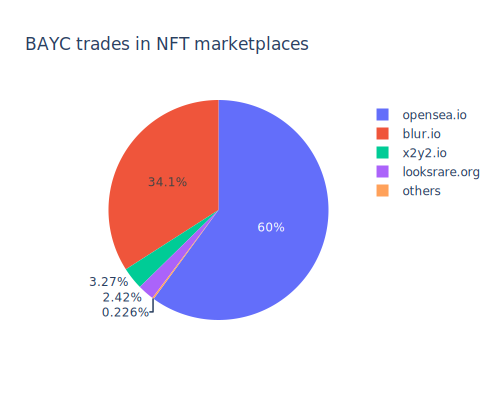

In [8]:
#Make a pie chart according to source
a = bayc_event['orderSource'].value_counts()
c = pd.Series(sum(a[4:]), index= ['others']) #Create a new
b = a[:4].add(c, fill_value=0)

labels= b.index
values= b
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title_text = "BAYC trades in NFT marketplaces", width =500, height = 400)
fig.show(renderer="svg")

In [9]:
bayc_event.index = range(len(bayc_event))

In [10]:
bayc = bayc_event.merge(bayc_trait, how='left', left_on='token.tokenId', right_index= True )

In [11]:
%store -r bayc

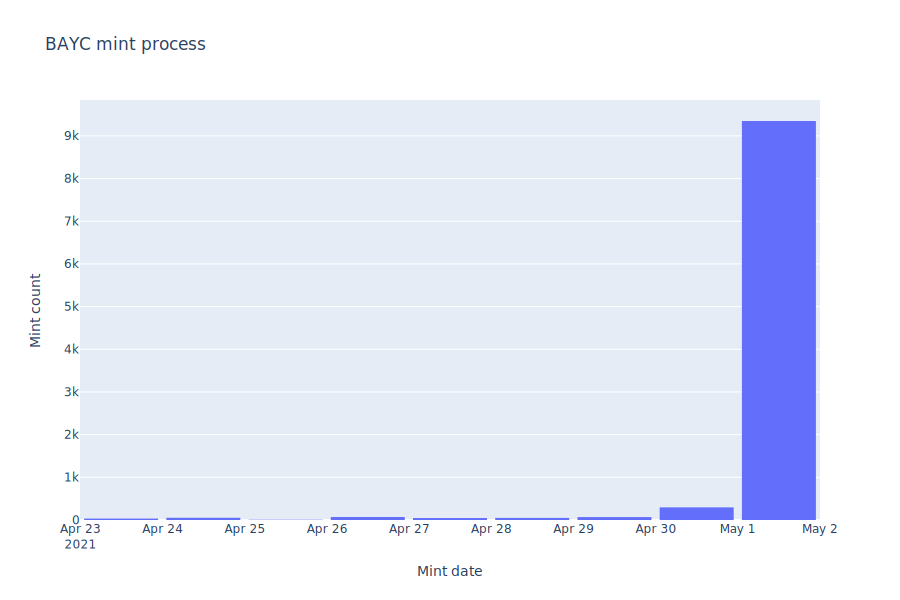

In [12]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=bayc[bayc['orderKind']== 'mint']['timestamp'],nbinsx= 10 ))
fig.update_layout(title_text = "BAYC mint process", 
                  width =900, height = 600, bargap= 0.1,
                  xaxis_title_text='Mint date', yaxis_title_text='Mint count',
                  barmode = 'stack'
                  )
fig.show(renderer="svg")

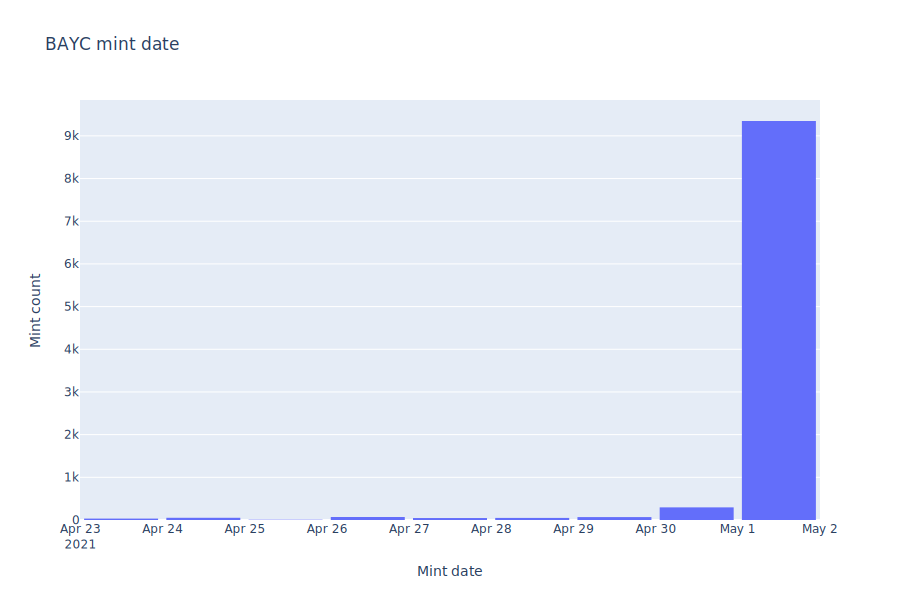

In [16]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=bayc[bayc['orderKind']== 'mint']['timestamp'],nbinsx= 10 ))
fig.update_layout(title_text = "BAYC mint date", 
                  width =900, height = 600, bargap= 0.1,
                  xaxis_title_text='Mint date', yaxis_title_text='Mint count',
                  barmode = 'stack'
                  )
fig.show(renderer="svg")

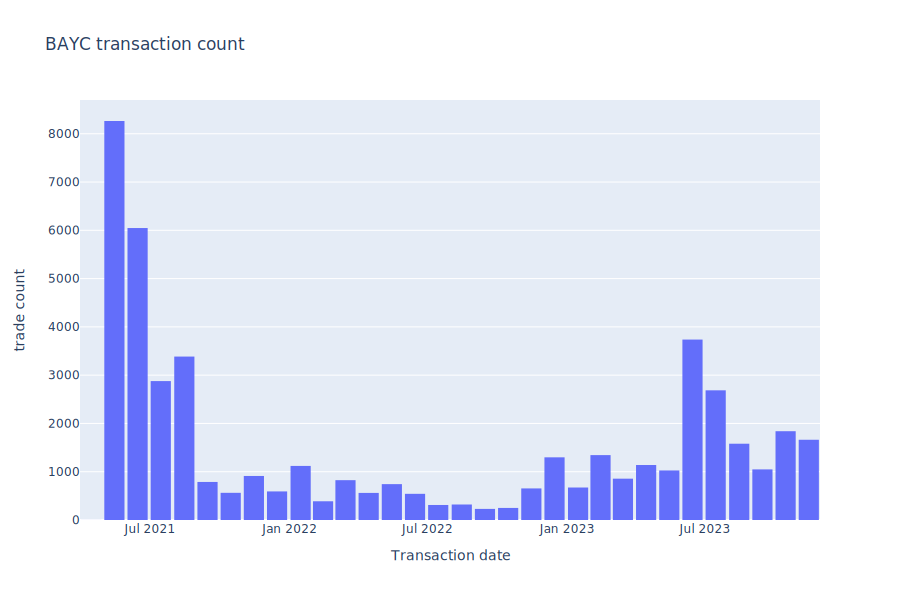

In [17]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=bayc[bayc['orderKind'] != 'mint']['timestamp'],nbinsx=40))
fig.update_layout(title_text = "BAYC transaction count", 
                  width =900, height = 600, bargap= 0.1,
                  xaxis_title_text='Transaction date', yaxis_title_text='trade count',
                  barmode = 'stack'
                  )
fig.show(renderer="svg")

In [18]:
pd.Series([i.week for i in bayc['timestamp']])

0         3
1        42
2        26
3        22
4        13
         ..
58227    17
58228    17
58229    17
58230    17
58231    17
Length: 58232, dtype: int64

In [15]:
bayc['month'] =bayc['timestamp'].dt.to_period('m')
week = pd.Series([i.week for i in bayc['timestamp']])
year = pd.Series([i.year for i in bayc['timestamp']])
bayc['week_yr'] = pd.to_datetime(year.astype(str) + ' ' + week.astype(str) + ' 1',
                                format='%Y %U %w')

In [20]:
bayc['price.currency.symbol'].value_counts()

price.currency.symbol
ETH     56582
WETH     1630
USDC       18
APE         2
Name: count, dtype: int64

In [13]:
bayc.columns

Index(['orderSide', 'orderSource', 'orderKind', 'from', 'to', 'block',
       'txHash', 'timestamp', 'washTradingScore', 'token.contract',
       'token.tokenId', 'price.currency.symbol', 'price.amount.decimal',
       'price.amount.usd', 'Background', 'Clothes', 'Earring', 'Eyes', 'Fur',
       'Hat', 'Mouth', 'month', 'precious'],
      dtype='object')

In [25]:
linechart = bayc[['week_yr','price.amount.usd']].groupby(by = 'week_yr', as_index=False).mean()
linechart.head(5)

,week_yr,price.amount.usd
0,2021-04-19,189.852148
1,2021-04-26,577.879749
2,2021-05-03,2554.461342
3,2021-05-10,2443.736076
4,2021-05-17,1495.249936


In [26]:
bayc.describe()

,block,timestamp,washTradingScore,token.tokenId,price.amount.decimal,price.amount.usd,week_yr
count,5.823200e+04,58232,58232.000000,58232.000000,58232.000000,5.823200e+04,58232
mean,1.443226e+07,2022-03-13 18:00:59.599275264,0.104135,5105.854994,60.570817,6.519867e+04,2022-03-10 20:50:53.990932480
min,1.229905e+07,2021-04-23 21:56:14,0.000000,5.000000,0.000000,0.000000e+00,2021-04-19 00:00:00
25%,1.236431e+07,2021-05-03 23:51:19.750000128,0.000000,2684.000000,0.500000,1.460548e+03,2021-05-03 00:00:00
50%,1.306333e+07,2021-08-20 16:56:29,0.000000,5101.000000,22.725000,3.953442e+04,2021-08-16 00:00:00
75%,1.699834e+07,2023-04-07 18:20:47,0.000000,7575.250000,45.860000,8.705392e+04,2023-04-03 00:00:00
max,1.859913e+07,2023-11-18 13:49:23,1.000000,9999.000000,160000.000000,2.923200e+06,2023-12-25 00:00:00
std,2.290452e+06,NaN,0.305438,2857.075761,1792.852050,9.818696e+04,NaN


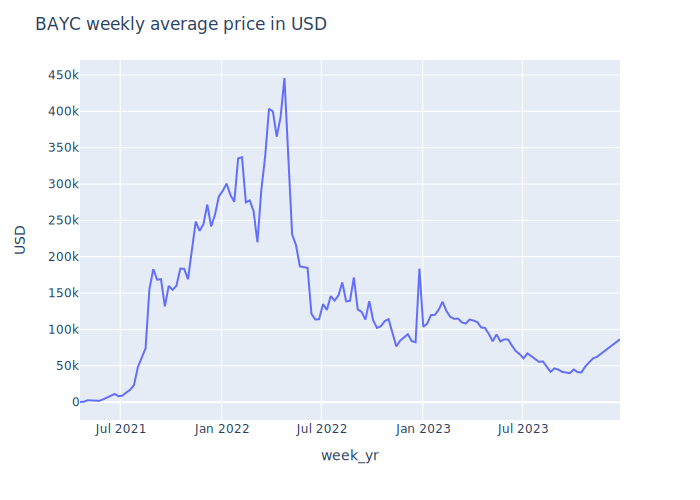

In [27]:
linechart['week_yr'] = linechart['week_yr'].astype(str)
fig = px.line(linechart, x="week_yr", y="price.amount.usd", markers= False)
#fig = px.line(linechart, x="month", y="price.amount.usd", text = 'month')
fig.update_traces(textposition="bottom right")
fig.update_layout(title='BAYC weekly average price in USD',
                   xaxis_title='week_yr',
                   yaxis_title='USD')
fig.show(renderer="svg")

In [29]:
linechart = bayc[bayc['price.currency.symbol'].isin(['ETH','WETH'])][['week_yr','price.amount.decimal']].groupby(by = 'week_yr', as_index=False).mean()
linechart.head(5)

,week_yr,price.amount.decimal
0,2021-04-19,0.080000
1,2021-04-26,0.201651
2,2021-05-03,0.792789
3,2021-05-10,0.637093
4,2021-05-17,0.539319


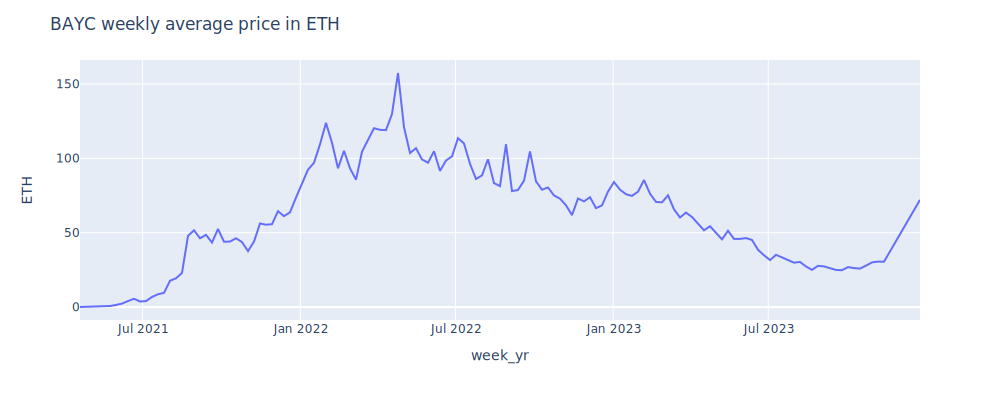

In [33]:
linechart['week_yr'] = linechart['week_yr'].astype(str)
fig = px.line(linechart, x="week_yr", y="price.amount.decimal", markers= False)
#fig = px.line(linechart, x="month", y="price.amount.usd", text = 'month')
fig.update_traces(textposition="bottom right")
fig.update_layout(title='BAYC weekly average price in ETH',
                  width=1000, height=400,
                   xaxis_title='week_yr',
                   yaxis_title='ETH')
fig.show(renderer="svg")

In [34]:
linechart['week_yr'] = linechart['week_yr'].astype(str)
fig = px.line(linechart, x="week_yr", y="price.amount.decimal", markers= False)
#fig = px.line(linechart, x="month", y="price.amount.usd", text = 'month')
fig.update_traces(textposition="bottom right")
fig.update_layout(title='BAYC weekly average price in ETH',
                   xaxis_title='week',
                   yaxis_title='ETH')
fig.show()

In [18]:
""" linechart['month'] = linechart['month'].astype(str)
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(14,7))
#a = sns.lineplot(box_group, x='Month_year', y='price',hue='marketplace_event_type')
a = sns.lineplot(linechart, x='month', y='price.amount.usd')
a.set(ylabel='Price(USD)')
plt.title('Azuki price history per gold traits', fontsize =30)
a.set_xticklabels(a.get_xticklabels() ,rotation=30) """

' linechart[\'month\'] = linechart[\'month\'].astype(str)\nsns.set_theme(style="whitegrid", palette="pastel")\nplt.figure(figsize=(14,7))\n#a = sns.lineplot(box_group, x=\'Month_year\', y=\'price\',hue=\'marketplace_event_type\')\na = sns.lineplot(linechart, x=\'month\', y=\'price.amount.usd\')\na.set(ylabel=\'Price(USD)\')\nplt.title(\'Azuki price history per gold traits\', fontsize =30)\na.set_xticklabels(a.get_xticklabels() ,rotation=30) '

In [31]:
df = pd.DataFrame({'year':[2015, 2018],
                   'weekofyear':[10,12]})

dates = df.year*100+df.weekofyear

df['date'] = pd.to_datetime(dates.astype(str) + '0', format='%Y%W%w')
print (df)

   year  weekofyear       date
0  2015          10 2015-03-15
1  2018          12 2018-03-25


Separate price analysis for BAYC traits

In [32]:
#10 most important features according to Dune user https://dune.com/queries/1956480/3230430

[(bayc['Fur']=='Solid Gold')
     |(bayc['Eyes']=='Blue Beams')
     |(bayc['Clothes']=='Black Suit')
     |(bayc['Hat']=='Prussian Helmet')
     |(bayc['Mouth'] =='Bored Unshaven Pipe')
     |(bayc['Fur'] =='Trippy')
     |(bayc['Mouth'].isin(['Bored Pipe','Bored Unshaven Dagger','Phoneme Wah', 'Bored Unshaven Pizza']))]

[0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 58227    False
 58228    False
 58229    False
 58230    False
 58231    False
 Length: 58232, dtype: bool]

In [33]:
precious = bayc[(bayc['Fur']=='Solid Gold')
     |(bayc['Eyes']=='Blue Beams')
     |(bayc['Clothes']=='Black Suit')
     |(bayc['Hat']=='Prussian Helmet')
     |(bayc['Mouth'] =='Bored Unshaven Pipe')
     |(bayc['Fur'] =='Trippy')
     |(bayc['Mouth'].isin(['Bored Pipe','Bored Unshaven Dagger','Phoneme Wah', 'Bored Unshaven Pizza']))]

In [34]:
Counter(bayc.index.isin(precious.index))

Counter({False: 54776, True: 3456})

In [35]:
bayc['precious'] = 'Common traits'
for i in bayc.index:
    if i in precious.index:
        bayc['precious'].loc[i] = 'precious traits'
    else:
        continue
bayc['precious'].value_counts()

<ipython-input-35-75746f39a685>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



precious
Common traits      54776
precious traits     3456
Name: count, dtype: int64

In [35]:
linechart = bayc[['week_yr','price.amount.usd','precious']].groupby(by = ['week_yr','precious'], as_index=False).mean()
linechart.head(5)

,week_yr,precious,price.amount.usd
0,2021-04-19,Common traits,189.993536
1,2021-04-19,precious traits,188.115099
2,2021-04-26,Common traits,528.274088
3,2021-04-26,precious traits,1185.167325
4,2021-05-03,Common traits,2375.211788


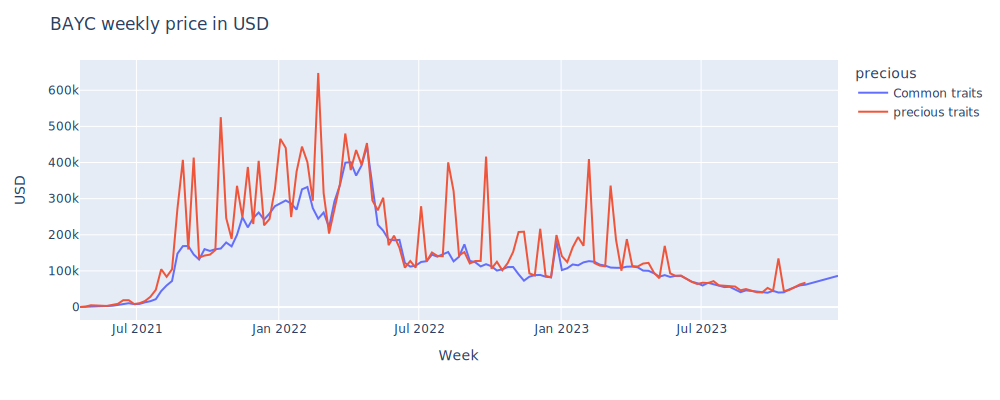

In [38]:
linechart['week_yr'] = linechart['week_yr'].astype(str)
fig = px.line(linechart, x="week_yr", y="price.amount.usd", markers= False, color='precious')
#fig = px.line(linechart, x="month", y="price.amount.usd", text = 'month')
fig.update_traces(textposition="bottom right")
fig.update_layout(title='BAYC weekly price in USD',
                    width = 1000, height=400,
                   xaxis_title='Week',
                   yaxis_title='USD')
fig.show(renderer="svg")
#From the chart, we can see BAYC do not have significant impact as expected, about July 2021 to Mar 2022, it may have some impacts but it is limited.

In [40]:
linechart['week_yr'] = linechart['week_yr'].astype(str)
fig = px.line(linechart, x="week_yr", y="price.amount.usd", markers= False, color='precious')
#fig = px.line(linechart, x="month", y="price.amount.usd", text = 'month')
fig.update_traces(textposition="bottom right")
fig.update_layout(title='BAYC weekly price in USD',
                   xaxis_title='Week',
                   yaxis_title='USD')
fig.show()

In [26]:
hischart = bayc

In [27]:
bayc.columns

Index(['orderSide', 'orderSource', 'orderKind', 'from', 'to', 'block',
       'txHash', 'timestamp', 'washTradingScore', 'token.contract',
       'token.tokenId', 'price.currency.symbol', 'price.amount.decimal',
       'price.amount.usd', 'Background', 'Clothes', 'Earring', 'Eyes', 'Fur',
       'Hat', 'Mouth', 'month', 'precious'],
      dtype='object')

In [28]:
bayc['orderKind'].value_counts()

orderKind
wyvern-v2           24639
mint                 9970
blur                 8342
blur-v2              6245
blend                1850
wyvern-v2.3          1830
x2y2                 1577
seaport              1377
looks-rare           1108
seaport-v1.5          793
seaport-v1.4          372
looks-rare-v2          58
bend-dao               45
nftx                    6
nft-trader              6
zeroex-v4-erc721        4
sudoswap                4
element-erc721          2
sudoswap-v2             2
zeroex-v2               1
zora-v3                 1
Name: count, dtype: int64

In [39]:
hischart = bayc[bayc['orderKind']!= 'mint'][['month','orderSource','price.amount.usd']].groupby(by=['month','orderSource'], as_index=False).count()
hischart['month'] = hischart['month'].astype(str)
hischart.head()

,month,orderSource,price.amount.usd
0,2021-04,opensea.io,1
1,2021-05,opensea.io,8264
2,2021-06,opensea.io,6047
3,2021-07,opensea.io,2877
4,2021-08,opensea.io,3385


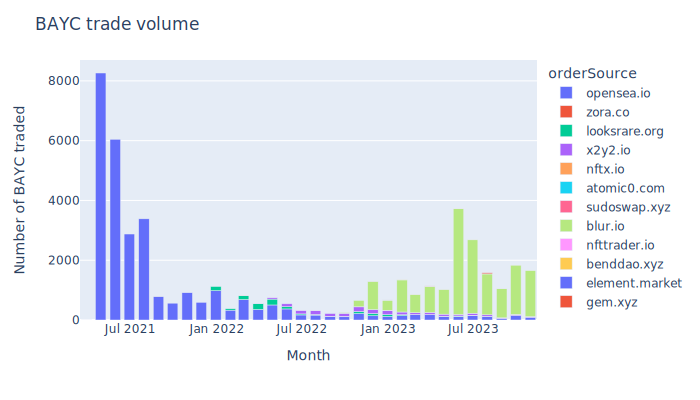

In [40]:

fig = px.bar(hischart, x='month', y='price.amount.usd',
             color='orderSource', height=400)
fig.update_layout(title='BAYC trade volume',
                   xaxis_title='Month',
                   yaxis_title='Number of BAYC traded')
fig.show(renderer="svg")

Check the arbitrage activities

In [41]:
%store -r bayc

In [42]:
bayc.columns

Index(['orderSide', 'orderSource', 'orderKind', 'from', 'to', 'block',
       'txHash', 'timestamp', 'washTradingScore', 'token.contract',
       'token.tokenId', 'price.currency.symbol', 'price.amount.decimal',
       'price.amount.usd', 'Background', 'Clothes', 'Earring', 'Eyes', 'Fur',
       'Hat', 'Mouth', 'month', 'precious'],
      dtype='object')

In [43]:
a = pd.Series(range(len(bayc)), index=bayc.index)
b = pd.Series(range(len(bayc)), index=bayc.index)

for i in bayc['token.tokenId'].unique():
    a.loc[bayc[bayc['token.tokenId'] == i].index] = bayc[bayc['token.tokenId'] == i]['timestamp'].diff()
    b.loc[bayc[bayc['token.tokenId'] == i].index] = bayc[bayc['token.tokenId'] == i]['price.amount.decimal'].diff()
bayc['time_diff'] = a
bayc['profit'] = b

<ipython-input-43-aba40d74480c>:5: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<TimedeltaArray>
[NaT]
Length: 1, dtype: timedelta64[ns]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



In [44]:
#There are some negative value due to the order of API, so take absolute value instead, 87 trades is True
Counter(abs(pd.to_timedelta(a)) < pd.to_timedelta('0 days 00:00:02')) 

Counter({False: 58145, True: 87})

In [45]:
d = abs(pd.to_timedelta(a))

In [48]:
fig = px.histogram(d, x=d)
fig.update_layout(title='Distribution of BAYC hold time (Informal chart)',
                   xaxis_title='Seconds',
                   bargap=0.2)
fig.show()

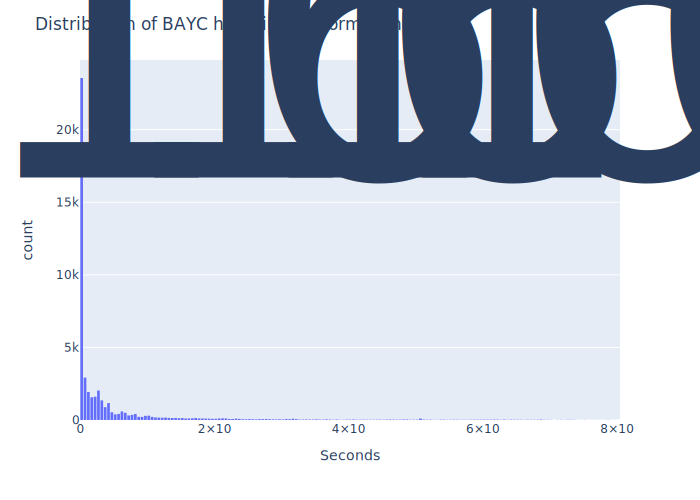

In [47]:
fig = px.histogram(d, x=d)
fig.update_layout(title='Distribution of BAYC hold time (Informal chart)',
                   xaxis_title='Seconds',
                   bargap=0.2)
fig.show(renderer="svg")

In [49]:
bots = bayc[abs(pd.to_timedelta(bayc['time_diff'])) < pd.to_timedelta('0 days 00:00:02')]

In [50]:
bots['profit'].value_counts().head(4) #Too many 0 profit, not interested

profit
 0.00000     61
-1.70711      1
 28.57310     1
-2.00000      1
Name: count, dtype: int64

In [51]:
bots= bots[bots['profit'] != 0]

In [ ]:
bots['absolute profit'] = abs(bots['profit'])

In [53]:
bots.columns

Index(['orderSide', 'orderSource', 'orderKind', 'from', 'to', 'block',
       'txHash', 'timestamp', 'washTradingScore', 'token.contract',
       'token.tokenId', 'price.currency.symbol', 'price.amount.decimal',
       'price.amount.usd', 'Background', 'Clothes', 'Earring', 'Eyes', 'Fur',
       'Hat', 'Mouth', 'month', 'precious', 'time_diff', 'profit',
       'absolute profit'],
      dtype='object')

In [54]:
bots[bots['to'] == '0x17b70f6b0dd3bf1322f972e84531767b8574e47e'][['from', 'to', 'block',
       'txHash', 'timestamp','time_diff','token.tokenId','absolute profit']]

,from,to,block,txHash,timestamp,time_diff,token.tokenId,absolute profit
8662,0x553ce858779daf0b24250641f1643ef899cfe132,0x17b70f6b0dd3bf1322f972e84531767b8574e47e,17414921.0,0x38231e85e6f968dec5643661841b7bc80bc5137d5779...,2023-06-05 14:31:59,0 days 00:00:00,1681,0.9447
12213,0x57849e1b07c06eb1590c2e4475a669e14415a5bd,0x17b70f6b0dd3bf1322f972e84531767b8574e47e,17606566.0,0xfba9c56a9790899d9d976f6678d3fb4c97d1a7267cf9...,2023-07-02 13:17:47,0 days 00:00:00,2300,1.8100
26587,0x78d8d0e65866be96b9ec64cfd54b4d80721b3eef,0x17b70f6b0dd3bf1322f972e84531767b8574e47e,17311035.0,0x1396c16d62d537ea9b19a1476d866f3e34e7d34873f7...,2023-05-21 23:37:47,0 days 00:00:00,4665,5.2100
35189,0x78d8d0e65866be96b9ec64cfd54b4d80721b3eef,0x17b70f6b0dd3bf1322f972e84531767b8574e47e,17311033.0,0x968bfcb4a54f85428b8739c3e372eb4a3e6ded983741...,2023-05-21 23:37:23,0 days 00:00:00,6153,6.2100
48649,0x7df70b612040c682d1cb2e32017446e230fcd747,0x17b70f6b0dd3bf1322f972e84531767b8574e47e,17531905.0,0x765f44eab5abae91465287b4dbc1e203f48f529cca72...,2023-06-22 01:29:23,0 days 00:00:00,8435,1.4000


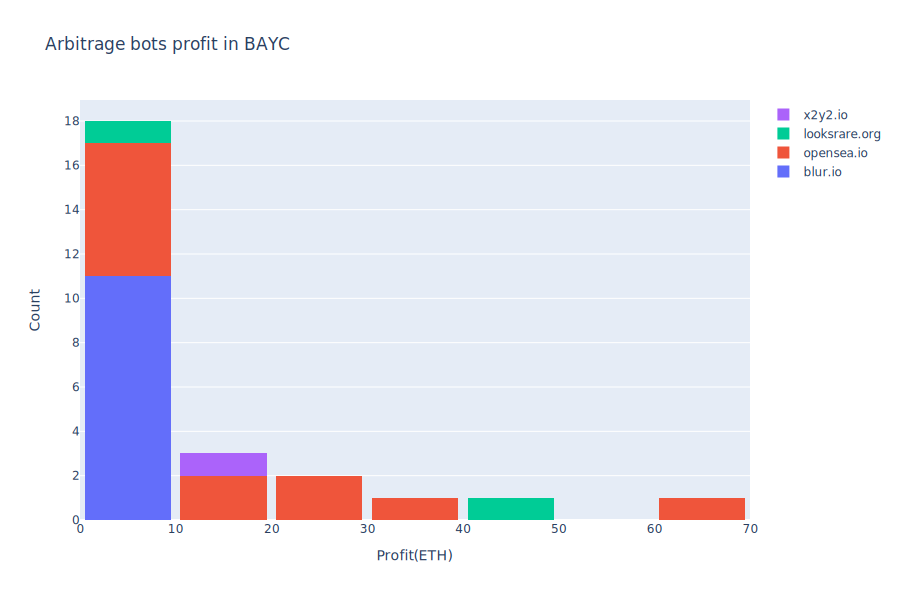

In [55]:
fig = go.Figure()
for i in bots['orderSource'].unique():
    fig.add_trace(go.Histogram(x=bots[bots['orderSource']== i]['absolute profit'], name= i ))
fig.update_layout(title_text = "Arbitrage bots profit in BAYC", 
                  width =900, height = 600, bargap= 0.1,
                  xaxis_title_text='Profit(ETH)', yaxis_title_text='Count',
                  barmode = 'stack'
                  )
fig.show(renderer="svg")

In [111]:
fig = go.Figure()
for i in bots['orderSource'].unique():
    fig.add_trace(go.Histogram(x=bots[bots['orderSource']== i]['absolute profit'], name= i ))
fig.update_layout(title_text = "Arbitrage bots profit in BAYC", 
                  width =900, height = 600, bargap= 0.1,
                  xaxis_title_text='Profit(ETH)', yaxis_title_text='Count',
                  barmode = 'stack'
                  )
fig.show()

In [106]:
bots['absolute profit'].sort_values()

44076     0.50050
5584      0.86000
8662      0.94470
48649     1.40000
26650     1.70711
12213     1.81000
51182     2.00000
19447     2.73450
41279     3.53688
11578     4.54740
5075      5.00000
40226     5.10000
26587     5.21000
34124     5.35260
35189     6.21000
42001     7.89000
24488     7.95000
18634     8.49000
5849     11.01000
38850    14.31000
31148    15.00000
8430     25.00000
52938    28.57310
6718     34.70000
56482    41.42500
17632    61.52100
Name: absolute profit, dtype: float64

In [109]:
bots.sort_values('absolute profit',ascending=False)[['from', 'to', 'block',
       'txHash', 'timestamp','time_diff', 'profit','absolute profit']].head(10)

,from,to,block,txHash,timestamp,time_diff,profit,absolute profit
17632,0x4a4c43230e64b397f6a0f11c8714f880741d5a9d,0x9fb274561770fd8a96af69f82492f815cc5b3817,14869839.0,0x841c2ebe79887f86246354297298e3ef6d156d1e78a0...,2022-05-30 01:38:39,0 days 00:00:00,-61.5210,61.5210
56482,0xb40e7dcc9855efe6dd0502ae01c7cbf301b1424a,0x000000591f843e0bcd61a4a7442ee722248d23a5,16220753.0,0x37c28ad447be7cdc8e1d96dd0a8df1b3cf3e759afc58...,2022-12-19 19:11:59,0 days 00:00:00,-41.4250,41.4250
6718,0x261812f2b755a272d6705f080ed63f02573adeb8,0x5ab04ab1757ff729ab63872f0c89c66911e7fbb5,14814192.0,0x33a8f0bf2577544cc6fedb857ced7c343d368349b32f...,2022-05-21 00:29:38,0 days 00:00:00,-34.7000,34.7000
52938,0x118b11fabe82d94fa2c5d119c291b1f2a0d7a4ef,0x07c3835a27a93a1d63494f83b1cc389df53fee5b,16767369.0,0x3dd61837e5f96e26fe278ee1a3b6f744ef014be04664...,2023-03-06 05:54:23,0 days 00:00:00,28.5731,28.5731
8430,0xf428227b9679a938fa44dc09e0dbb38cb8e49e90,0x82376f79d776d25a8f37cb4716577f271ff10e1c,16124588.0,0x34738ae6b3b6d9784dd8203bd0ce9c7fb3b5de724a9d...,2022-12-06 08:34:47,0 days 00:00:00,25.0000,25.0000
31148,0x8dc3e15024f1a9b8e8c7ae605453951a89a2046d,0x6b58007b960016b2f559dbfd809ac4dcb1febdfe,14606061.0,0x2f76c9669b424dd67fdbdddab5bc41b12d1f0bff9e22...,2022-04-18 00:45:36,0 days 00:00:00,-15.0000,15.0000
38850,0xab2ecce87363531f0b9368b7a838117b9c57664b,0x82376f79d776d25a8f37cb4716577f271ff10e1c,16122474.0,0x9fd13e2ac69991769c24e1586e37f7700155a031b34a...,2022-12-06 01:29:59,0 days 00:00:00,14.3100,14.3100
5849,0xaf0f4479af9df756b9b2c69b463214b9a3346443,0x6af9ea7293a4fdafec5792344632f58fd0ff4eb7,14876055.0,0x6a4d1ce68dcb84a03b93160cb65cf07dba9d254abd21...,2022-05-31 01:54:06,0 days 00:00:00,-11.0100,11.0100
18634,0xf61e3aaf15936fc3df574c2ea0c3fb6498329de2,0x131a842d54f278565ff1fc81983835d380bf164a,16166153.0,0xc4d2445a6527922455cce3bcf4d6e36a8cf0bf66d302...,2022-12-12 04:10:23,0 days 00:00:00,8.4900,8.4900
24488,0x6e0d10c284a55ee10a28cd7ad9314c5b3fca92a5,0x131a842d54f278565ff1fc81983835d380bf164a,16324570.0,0xd36076370b6a46372f9a0609e7ce963a68f1f6066959...,2023-01-03 06:49:35,0 days 00:00:00,-7.9500,7.9500


In [39]:
bayc[bayc['token.tokenId'] == 20]['timestamp'].diff()

35                   NaT
40   -172 days +19:52:40
41    -97 days +16:24:41
43    -22 days +01:22:15
Name: timestamp, dtype: timedelta64[ns]

Analysis of active addresses

In [57]:
active = pd.concat((bayc['from'], bayc['to'])).value_counts()

In [127]:
['0x020ca66c30bec2c4fe3861a94e4db4a498a35872' in active]

[True]

In [ ]:
bayc[bayc['to']== '0x020ca66c30bec2c4fe3861a94e4db4a498a35872']

In [130]:
active.loc['0x020ca66c30bec2c4fe3861a94e4db4a498a35872']

2894

In [134]:
#Address '0x020ca66c30bec2c4fe3861a94e4db4a498a35872' is in hot wallet address
active[1:11] #The first record is a mint address '0x0000000000000000000000000000000000000000'

0x020ca66c30bec2c4fe3861a94e4db4a498a35872    2894
0xd387a6e4e84a6c86bd90c158c6028a58cc8ac459    2478
0xed2ab4948ba6a909a7751dec4f34f303eb8c7236    1881
0x7df70b612040c682d1cb2e32017446e230fcd747    1795
0x77e3e957082ca648c1c5b0f3e6aec00ab1245186    1777
0xcbb0fe555f61d23427740984325b4583a4a34c82    1146
0x385ce35599ae5e6f0eaf0f69841fffa9f41acdd5    1085
0x5f1ee29361206f1a129e808736f11598356c6031     970
0x721931508df2764fd4f70c53da646cb8aed16ace     932
0xfa0e027fcb7ce300879f3729432cd505826eaabc     811
Name: count, dtype: int64

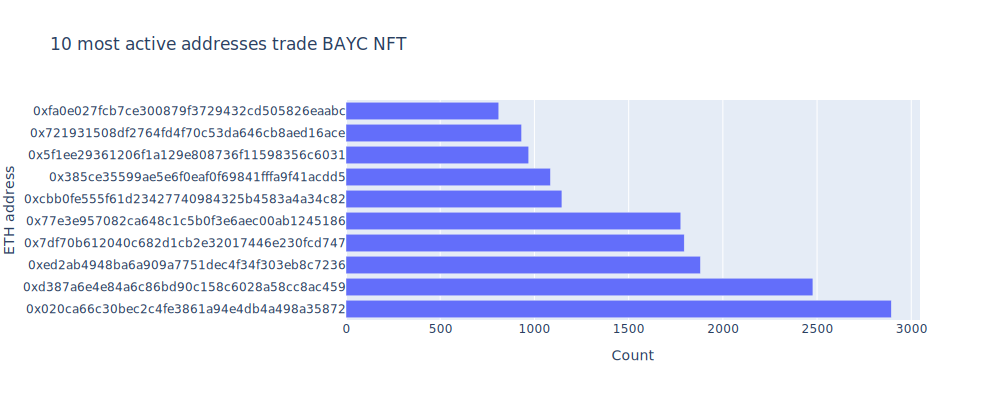

In [65]:
fig = go.Figure()

fig.add_trace(go.Bar(y=active.index[1:11], x=active[1:11], name='contestant', orientation= 'h'))
fig.update_layout(title_text = "10 most active addresses trade BAYC NFT", width=1000, height=400)
fig.update_yaxes(title_text="ETH address")
fig.update_xaxes(title_text="Count")
fig.show(renderer="svg")

In [137]:
fig = go.Figure()

fig.add_trace(go.Bar(y=active.index[1:11], x=active[1:11], name='contestant', orientation= 'h'))
fig.update_layout(title_text = "10 most active addresses trade BAYC NFT")
fig.update_yaxes(title_text="ETH address")
fig.update_xaxes(title_text="Count")
fig.show()